TP  2 : Introduction à la bibliothèque spaCy et à l'analyse linguistique de texte
====

1 - Introduction 
------

L'objectif de ce TP est de se familiariser avec la bilbiothèque spaCy et de comprendre les différentes analyses linguistiques possibles au niveau du mot et notamment le couplage texte - ontologie. 

N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d\'utilisation accompagnent généralement l\'explication de chaque fonction.

- spaCy: https://spacy.io/api
- NLTK: https://www.nltk.org/
- WordCloud : https://amueller.github.io/word_cloud/
- Counter : https://docs.python.org/3/library/collections.html
- Python 3: https://docs.python.org/3/
- Matplotilb: https://matplotlib.org/contents.html

In [2]:
# A exécuter si ces librairies ne sont pas sur vos machines
#!pip install --user spacy
#!pip install --user nltk
#!pip install --user wordcloud
#!python3 -m spacy download en_core_web_lg
#!python3 -m spacy download fr_core_news_sm

import spacy

# Pour vérifier si le modèle anglais est installé
if spacy.util.is_package("en_core_web_lg"):
    print("Le modèle 'en_core_web_lg' est déjà installé.")
else:
    print("Le modèle 'en_core_web_lg' n'est pas installé.")

# Pour vérifier si le modèle français est installé
if spacy.util.is_package("fr_core_news_sm"):
    print("Le modèle 'fr_core_news_sm' est déjà installé.")
else:
    print("Le modèle 'fr_core_news_sm' n'est pas installé.")



/home/romain/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Le modèle 'en_core_web_lg' est déjà installé.
Le modèle 'fr_core_news_sm' est déjà installé.


In [3]:
import spacy
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from wordcloud import WordCloud
from collections import Counter

2 - Génération de nuages de mots avec une motivation linguistique
-----

Importer le modèle de langue français.

In [4]:
# Pour impoter le moduèle : !python -m spacy download fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")
# si vous voulez utiliser un autre modèle voici quelques liens intéressants
# Tous les modèles : https://spacy.io/models
# Anglais : https://spacy.io/models/en
# Italien : https://spacy.io/models/it

Lire l'un des deux textes proposés dans ce TP: sport.text ou sante.text.

In [5]:
text_path1 = "sante.txt"
text_path2 = "sante.txt"

text1 = ""
with open(text_path1, encoding='utf-8') as f:
    text1 = f.read()
    
text2 = ""
with open(text_path2, encoding='utf-8') as f:
    text2 = f.read()

Transformer le texte en un objet "nlp" de la bibliothèque spaCy qui vous permet d'accéder facilement aux objets textuels.

In [6]:
doc = nlp(text1)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_)

doc2 = nlp(text2)
for token in doc2:
    print(token.text, token.lemma_, token.pos_, token.dep_)

Grippe Grippe PROPN ROOT
: : PUNCT punct
six six NUM nummod
questions question NOUN nmod
sur sur ADP case
la le DET det
campagne campagne NOUN nmod
de de ADP case
vaccination vaccination NOUN nmod
qui qui PRON nsubj
débute débuter VERB acl:relcl
mardi mardi NOUN advmod


 

 SPACE dep
Les le DET det
personnes personne NOUN nsubj
âgées âgé ADJ amod
de de ADP case
65 65 NUM nummod
ans an NOUN obl:arg
et et CCONJ cc
plus plus ADV conj
, , PUNCT punct
celles celui PRON conj
atteintes atteindre VERB acl
de de ADP case
certaines certain DET det
maladies maladie NOUN obl:agent
chroniques chronique ADJ amod
, , PUNCT punct
les le DET det
femmes femme NOUN obl:mod
enceintes enceinte ADJ amod
, , PUNCT punct
les le DET det
personnes personne NOUN nsubj:pass
souffrant souffrir VERB acl
d' de ADP case
obésité obésité NOUN obl:arg
ainsi ainsi ADV cc
que que SCONJ fixed
l' le DET det
entourage entourage NOUN conj
des de ADP case
nourrissons nourrisson NOUN nmod
fragiles fragile ADJ amod
sont être AU

Fonction qui retourne la fréquence des 50 mots les plus fréquents dans un document.

In [7]:
freq_list = Counter(
    token.text for token in doc
    if "\n" not in token.text
)
freq_list.most_common(50)

[('de', 52),
 (',', 50),
 ('les', 39),
 ('la', 35),
 ('.', 35),
 ('"', 22),
 ('et', 21),
 ('en', 20),
 ('le', 20),
 ('à', 19),
 ('grippe', 17),
 ('vaccination', 16),
 ("l'", 16),
 ('est', 16),
 ('personnes', 12),
 ('contre', 10),
 ('une', 10),
 ('a', 10),
 ('des', 9),
 ('?', 8),
 ('(', 8),
 (')', 8),
 ("d'", 7),
 ('faire', 7),
 ('moins', 7),
 ('Covid-19', 7),
 ('sur', 6),
 ('campagne', 6),
 ('que', 6),
 ('vacciner', 6),
 ('octobre', 6),
 ('par', 6),
 ('du', 6),
 ('vous', 6),
 ('-', 6),
 ('un', 6),
 ('pas', 6),
 ('plus', 5),
 ('fragiles', 5),
 ('deux', 5),
 ('risque', 5),
 ('au', 5),
 ('pour', 5),
 ('épidémie', 5),
 (':', 4),
 ('qui', 4),
 ('femmes', 4),
 ('sont', 4),
 ('cette', 4),
 ('La', 4)]

[Q1] Programmer la suite d'instructions pour calculer les 40 mots les plus fréquents du fichier sante.txt.

In [8]:
doc2 = nlp(text2)
freq_list2 = Counter(
    token.text for token in doc2
    if "\n" not in token.text
)
freq_list2.most_common(40)



[('de', 52),
 (',', 50),
 ('les', 39),
 ('la', 35),
 ('.', 35),
 ('"', 22),
 ('et', 21),
 ('en', 20),
 ('le', 20),
 ('à', 19),
 ('grippe', 17),
 ('vaccination', 16),
 ("l'", 16),
 ('est', 16),
 ('personnes', 12),
 ('contre', 10),
 ('une', 10),
 ('a', 10),
 ('des', 9),
 ('?', 8),
 ('(', 8),
 (')', 8),
 ("d'", 7),
 ('faire', 7),
 ('moins', 7),
 ('Covid-19', 7),
 ('sur', 6),
 ('campagne', 6),
 ('que', 6),
 ('vacciner', 6),
 ('octobre', 6),
 ('par', 6),
 ('du', 6),
 ('vous', 6),
 ('-', 6),
 ('un', 6),
 ('pas', 6),
 ('plus', 5),
 ('fragiles', 5),
 ('deux', 5)]

In [9]:
# Insérer votre code ici

Fonction qui génère un nuage de mots à partir d'une liste de mots ordonnés par leur fréquence.

In [10]:
#!pip install --upgrade Pillow
def generate_wordcloud(freq_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(freq_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

Génerer le nuage de mots

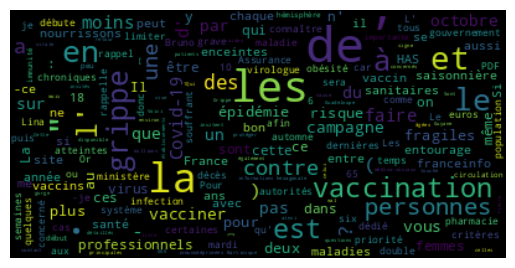

In [11]:
generate_wordcloud(freq_list)



[Q2] Générer le nuage de mots du fichier sante.txt.

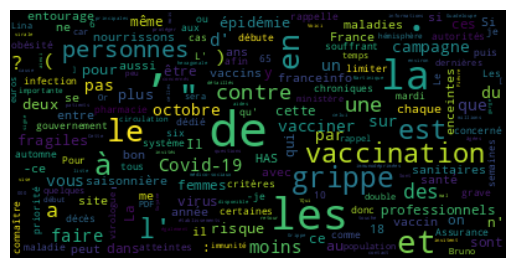

In [12]:
generate_wordcloud(freq_list2)

Fonction qui ne compte que les fréquences des mots qui ne sont pas de mots vides. Rappel, un mot vide est un mot qui n'a pas de sens dénotatif particulier. Ce sont les déterminants, les prépositions etc.

In [13]:
freq_list = Counter(token.text for token in doc if not token.is_stop if not "\n" in token.text)

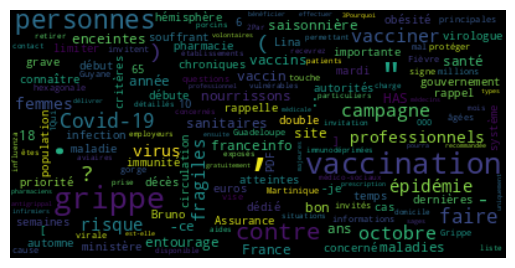

In [14]:
generate_wordcloud(freq_list)

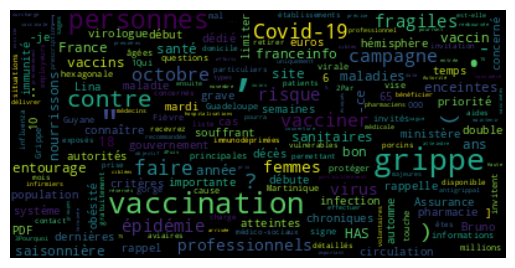

In [15]:
generate_wordcloud(freq_list)

[Q3] Générer le nuage de mots pour tous les mots sauf ceux qui sont un mot vide ou une ponctuation.

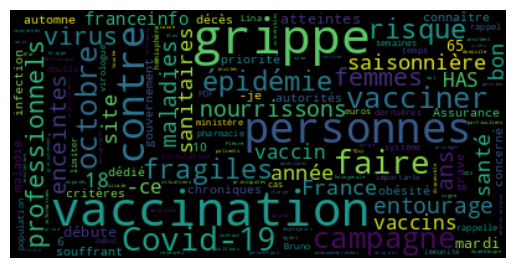

In [16]:
freq_list = Counter(token.text for token in doc if not token.is_stop and not token.is_punct  if not "\n" in token.text)
generate_wordcloud(freq_list)

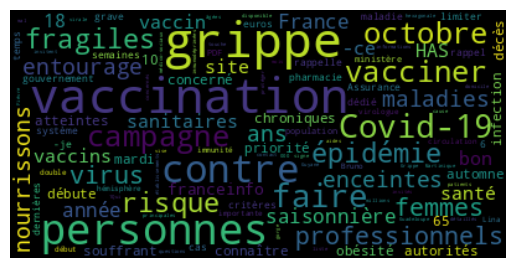

In [17]:
freq_list = Counter(token.text for token in doc if not token.is_stop and not token.is_punct  if not "\n" in token.text)
generate_wordcloud(freq_list)

Fonction qui génère un nuage de lemmes, i.e. du radical d'un mot.

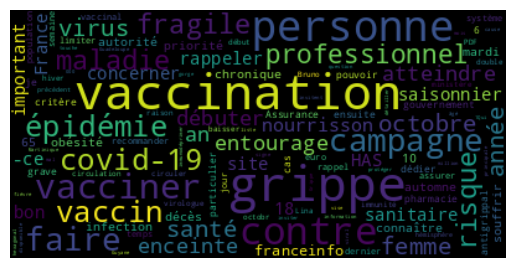

In [18]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct if not "\n" in token.text)
generate_wordcloud(freq_list)

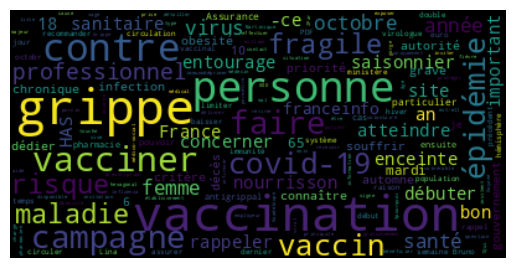

In [19]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct if not "\n" in token.text)
generate_wordcloud(freq_list)

Fonction qui génère un nuage de lemmes nominaux, i.e. seulement les noms.

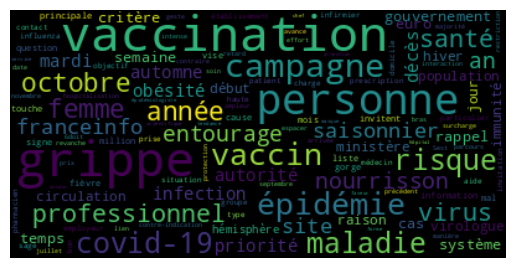

In [20]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN" if not "\n" in token.text)
generate_wordcloud(freq_list)

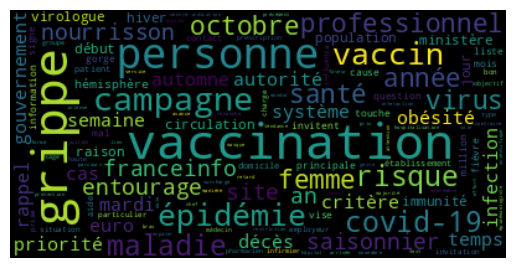

In [21]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN" if not "\n" in token.text)
generate_wordcloud(freq_list)

[Q4] Générer le nuage de lemmes adjectivaux pour le texte sante.txt.

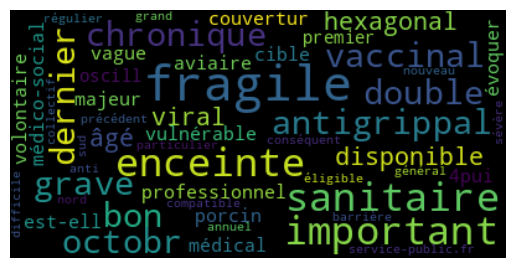

In [22]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "ADJ" if not "\n" in token.text)
generate_wordcloud(freq_list)

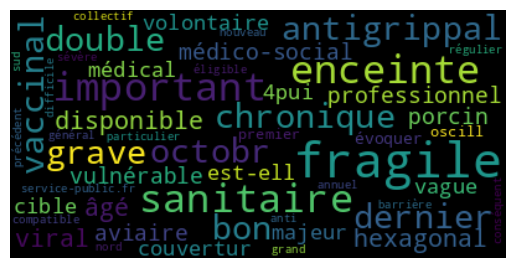

In [23]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "ADJ" if not "\n" in token.text)
generate_wordcloud(freq_list)

Fonction qui génère un nuage d'entités nommées de type personne.

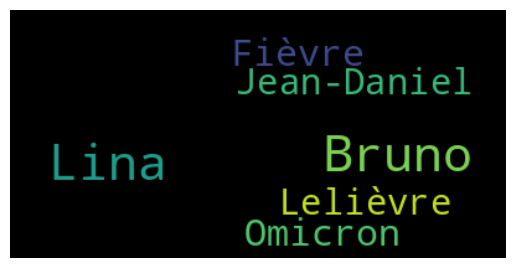

In [24]:
freq_list = Counter(token.text for token in doc if not token.is_stop and not token.is_punct and token.ent_type_ == "PER" if not "\n" in token.text)
generate_wordcloud(freq_list)

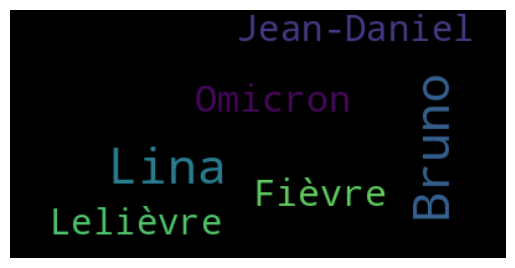

In [25]:
freq_list = Counter(token.text for token in doc2 if not token.is_stop and not token.is_punct and token.ent_type_ == "PER" if not "\n" in token.text)
generate_wordcloud(freq_list)

[Q5] Générer le nuage d'entités nommées de type Localisation pour le texte sante.txt.

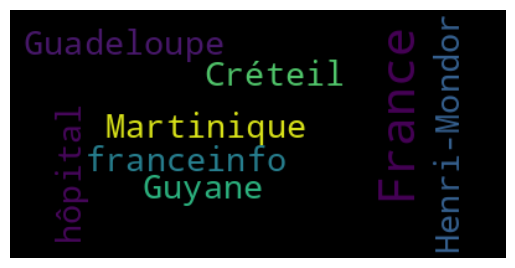

In [26]:
location_entities = ' '.join(ent.text for ent in doc2.ents if ent.label_ == "LOC")
generate_wordcloud(Counter(location_entities.split()))

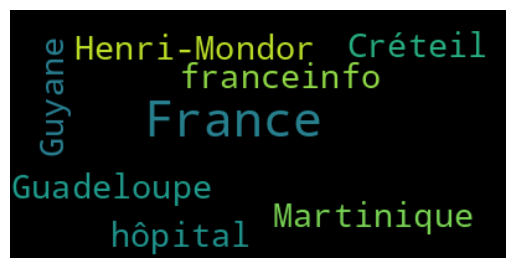

In [27]:
location_entities = ' '.join(ent.text for ent in doc.ents if ent.label_ == "LOC")
generate_wordcloud(Counter(location_entities.split()))

Fonction qui génère un nuage de mots qui sont compléments d'objet.

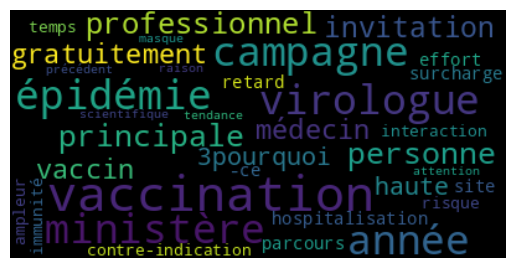

In [28]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "obj" if not "\n" in token.text)
generate_wordcloud(freq_list)

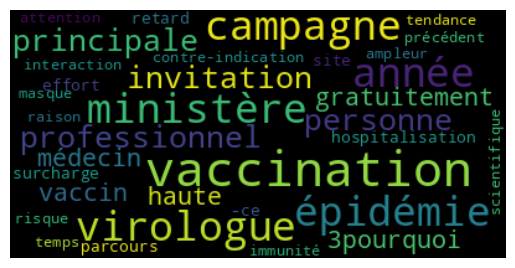

In [29]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "obj" if not "\n" in token.text)
generate_wordcloud(freq_list)

[Q6] Générer le nuage des noms qui sont un sujet pour le texte sport.txt.

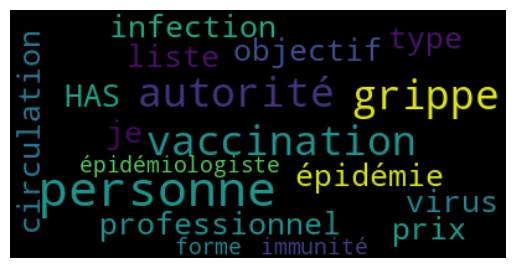

In [30]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "nsubj" if not "\n" in token.text)
generate_wordcloud(freq_list)

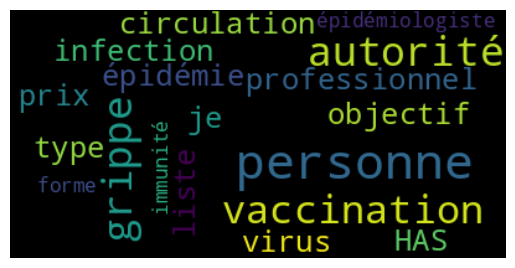

In [31]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "nsubj" if not "\n" in token.text)
generate_wordcloud(freq_list)

3 - Liste des informations linguistiques et leur visualisation
-----

Fonction qui montre toutes les informations linguistiques disponibles pour chacune des phrases d'un texte.

In [32]:
#print('\n'.join(['\t'.join([str(token.i), token.text, token.lemma_, token.pos_, str(token.morph), str(token.head.i), token.dep_, token.ent_type_, token.ent_iob_]) for sent in doc.sents
#                 for token in sent]))
print('\n'.join(['\t'.join([str(token.i), token.text, token.lemma_, token.pos_, str(token.morph), str(token.head.i), token.dep_, token.ent_type_, token.ent_iob_]) for sent in doc2.sents
                 for token in sent]))

0	Grippe	Grippe	PROPN		0	ROOT		O
1	:	:	PUNCT		0	punct		O
2	six	six	NUM	NumType=Card	3	nummod		O
3	questions	question	NOUN	Gender=Fem|Number=Plur	0	nmod		O
4	sur	sur	ADP		6	case		O
5	la	le	DET	Definite=Def|Gender=Fem|Number=Sing|PronType=Art	6	det		O
6	campagne	campagne	NOUN	Gender=Fem|Number=Sing	3	nmod		O
7	de	de	ADP		8	case		O
8	vaccination	vaccination	NOUN	Gender=Fem|Number=Sing	6	nmod		O
9	qui	qui	PRON	PronType=Rel	10	nsubj		O
10	débute	débuter	VERB	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	6	acl:relcl		O
11	mardi	mardi	NOUN	Gender=Masc|Number=Sing	10	advmod		O
12	

	

	SPACE		11	dep		O
13	Les	le	DET	Definite=Def|Number=Plur|PronType=Art	14	det		O
14	personnes	personne	NOUN	Gender=Fem|Number=Plur	46	nsubj		O
15	âgées	âgé	ADJ	Gender=Fem|Number=Plur	14	amod		O
16	de	de	ADP		18	case		O
17	65	65	NUM	NumType=Card	18	nummod		O
18	ans	an	NOUN	Gender=Masc|Number=Plur	15	obl:arg		O
19	et	et	CCONJ		20	cc		O
20	plus	plus	ADV		18	conj		O
21	,	,	PUNCT		22	punct		O
22	celles	celui	PR

Visualisation des entités nommées dans un texte.

In [33]:
from spacy import displacy
displacy.render(doc, style="ent")

Visualisation de l'abre de dépendance d'une phrase donnée.

In [34]:
displacy.render(list(doc.sents)[4], style="dep")

In [35]:
displacy.render(list(doc.sents)[4], style="dep")

[Q7] Visualiser l'abre de dépendance de la dixième phrase dans un format compact.

In [36]:

# Visualiser l'arbre de dépendance syntaxique pour la dixième phrase
displacy.render(list(doc.sents)[9], style="dep")

In [37]:
# insérer votre code ici

4 - Utilisation d'une image pour la réalisation d'un nuage de mots
-----

In [38]:
from PIL import Image
import numpy as np

Convertir l'image en une matrice de valeurs 0 ou 255, i.e. un masque.

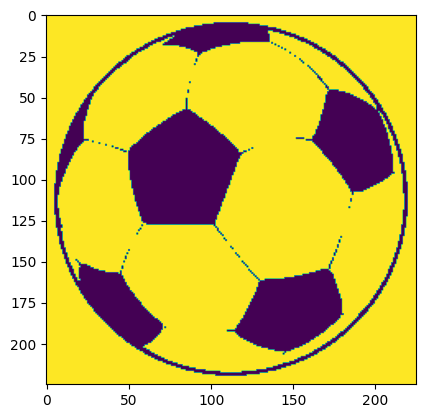

In [39]:
#mask = (np.array(Image.open("heart.png").convert('L')) > 0) * 255
mask = (np.array(Image.open("football.png").convert('L')) > 0) * 255
plt.imshow(mask)

Génerer le nuage de mots avec des masques. 

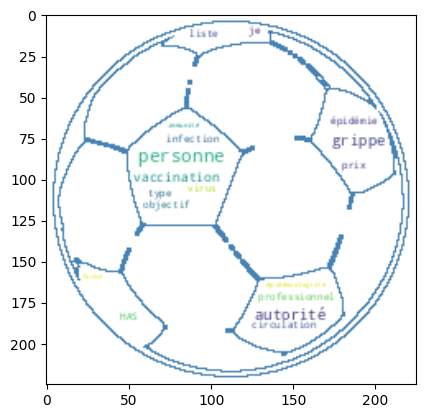

In [40]:
wc = WordCloud(background_color="white", max_words=100, mask=mask, contour_width=1, contour_color='steelblue')
wc.generate_from_frequencies(freq_list)
plt.imshow(wc, interpolation='bilinear')

5 - Extraire des unités polylexicales
-----

In [41]:
import nltk
from nltk.collocations import *

Trouver les bigrams avec l'information mutuelle la plus forte.

In [42]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(bigram_measures.pmi, 10)

[(' \n\n', 'Quatre'),
 ('-on', 'craindre'),
 ('15', 'novembre'),
 ('6Doit', '-on'),
 ('75', '%'),
 ('En', 'revanche'),
 ('Haute', 'Autorité'),
 ('Jean-Daniel', 'Lelièvre'),
 ('Quatre', 'types'),
 ('Sont', 'également')]

[Q8] Trouver les 10 bigrams avec le coefficient de DICE le plus élevé.

In [43]:
#Trouver les 10 bigrams avec le coefficient de DICE le plus élevé.
finder.nbest(bigram_measures.dice, 10)


[(' \n\n', 'Quatre'),
 ('-on', 'craindre'),
 ('15', 'novembre'),
 ('6Doit', '-on'),
 ('75', '%'),
 ('Bruno', 'Lina'),
 ('En', 'revanche'),
 ('Haute', 'Autorité'),
 ('Jean-Daniel', 'Lelièvre'),
 ('Quatre', 'types')]

Trouver les 10 trigrams avec l'information mutuelle la plus élevée.

In [44]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(trigram_measures.pmi, 10)

[(' \n\n', 'Quatre', 'types'),
 ('6Doit', '-on', 'craindre'),
 ('Sont', 'également', 'concernés'),
 ('avançait', 'trois', 'autres'),
 ('circulé', 'depuis', '2020'),
 ('particuliers', 'employeurs', 'vulnérables'),
 ('peuvent', 'ensuite', 'effectuer'),
 ('prescription', 'médicale', 'préalable'),
 ('sa', 'huitième', 'vague'),
 ('trois', 'autres', 'raisons')]

[Q9] Trouver les 10 trigrams avec le coefficient de DICE le plus élevé. Que se passe-t-il? Quelles sont les alternatives?

Le coefficient de Dice est une mesure d'association utilisée principalement pour les bigrams, pas pour les trigrams. Elle est calculée en prenant deux fois le nombre de cooccurrences de deux mots et en le divisant par la somme des fréquences individuelles de ces mots. Cela fonctionne bien pour les paires de mots, mais cette mesure n'est pas définie pour les trigrams dans les outils standard tels que NLTK.

In [45]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(trigram_measures.pmi, 10)
# l'alternative est de prendre les 10 trigrams avec le coefficient de PMI le plus élevé

[(' \n\n', 'Quatre', 'types'),
 ('6Doit', '-on', 'craindre'),
 ('Sont', 'également', 'concernés'),
 ('avançait', 'trois', 'autres'),
 ('circulé', 'depuis', '2020'),
 ('particuliers', 'employeurs', 'vulnérables'),
 ('peuvent', 'ensuite', 'effectuer'),
 ('prescription', 'médicale', 'préalable'),
 ('sa', 'huitième', 'vague'),
 ('trois', 'autres', 'raisons')]

Intégrer les 30 meilleurs bigrams suivant le coefficient de DICE dans un texte en les connectant par un underscore. Et générer le nuage de mot correspondant. 

In [46]:
from nltk.tokenize import MWETokenizer

['-on_craindre', '15_novembre', '6Doit_-on', '75_%', 'Bruno_Lina', 'En_revanche', 'Haute_Autorité', 'Jean-Daniel_Lelièvre', 'Quatre_types', 'Sont_également', 'années_précédentes', 'aucune_contre-indication', 'autres_raisons', 'avançait_trois', 'cause_environ', 'cet_hiver', 'circulé_depuis', 'collective_acquise', 'couverture_vaccinale', 'depuis_2020', 'doivent_bénéficier', 'débute_mardi', 'elle_semble', 'employeurs_vulnérables', 'ensuite_effectuer', 'est-elle_recommandée', 'eu_très', 'gestes_barrières', 'gouvernement_dédié', 'grande_majorité']


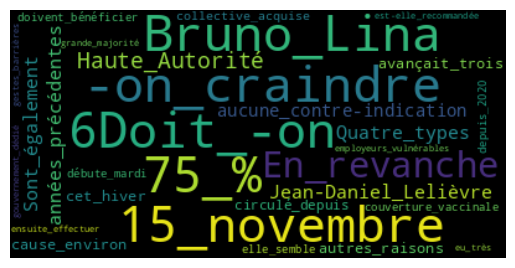

In [47]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words([token.text for token in doc])
#filtre pour ne pas considerer les retours à la ligne
finder.apply_word_filter(lambda w: "\n" in w)
finder.nbest(bigram_measures.dice, 30)
#creer une liste de bigrams connectés par un underscore
bestBigramsDice30UnderScore = ['_'.join(bigram) for bigram in finder.nbest(bigram_measures.dice, 30)]
print(bestBigramsDice30UnderScore)
generate_wordcloud(Counter(bestBigramsDice30UnderScore))

[Q10] Intégrer les 30 meilleurs trigrams suivant l'information mutuelle dans un texte en les connectant par un underscore. Et générer un nuage de mot qui ne contient que des trigrams.

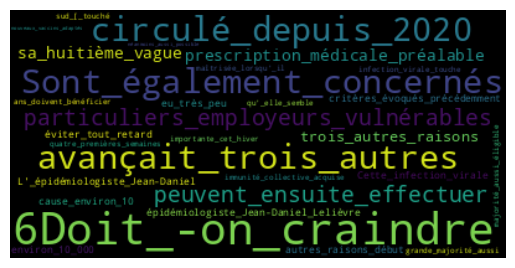

In [48]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.apply_word_filter(lambda w: "\n" in w)
finder.nbest(trigram_measures.pmi, 30)
bestBigramsPMI30UnderScore = ['_'.join(bigram) for bigram in finder.nbest(trigram_measures.pmi, 30)]
generate_wordcloud(Counter(bestBigramsPMI30UnderScore))

6 - Enrichissement des textes par liaison ontologique
-----

In [49]:
from nltk.corpus import wordnet as wn
#import nltk
#nltk.download('omw-1.4')

L'algorithme de Lesk (https://en.wikipedia.org/wiki/Lesk_algorithm) permet de désambiguiser le sens d'un mot dans un contexte défini. Par exemple, dans la phrase, "le chanteur danse la java avec des choristes", l'algorithme de Lesk permet de désambiguiser le sens de java, i.e. java dans les sens de danse et non java dans le sens de café ou de langage de programmation. L'algorithme de Lesk retourne le sens correspondant à un mot dans un contexte donné.

In [50]:
def lesk(context_sentence, ambiguous_word, pos=None, synsets=None):
    
    """Return a synset for an ambiguous word in a context.
    :param iter context_sentence: The context sentence where the ambiguous word
         occurs, passed as an iterable of words.
    :param str ambiguous_word: The ambiguous word that requires WSD.
    :param str pos: A specified Part-of-Speech (POS).
    :param iter synsets: Possible synsets of the ambiguous word.
    :return: ``lesk_sense`` The Synset() object with the highest signature overlaps.
    This function is an implementation of the original Lesk algorithm (1986) [1].
    Usage example::
        >>> lesk(['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.'], 'bank', 'n')
        Synset('savings_bank.n.02')
    [1] Lesk, Michael. "Automatic sense disambiguation using machine
    readable dictionaries: how to tell a pine cone from an ice cream
    cone." Proceedings of the 5th Annual International Conference on
    Systems Documentation. ACM, 1986.
    https://dl.acm.org/citation.cfm?id=318728
    """

    context = set(context_sentence)
    
    if synsets is None:
        # synsets = wn.synsets(ambiguous_word, lang='fra')
        synsets = wn.synsets(ambiguous_word)
    
    if pos:
        synsets = [ss for ss in synsets if str(ss.pos()) == pos]

    if not synsets:
        return None
    
    _, sense = max(
        (len(context.intersection(ss.definition().split())), ss) for ss in synsets
    )

    return sense

Nous travaillerons avec un texte en anglais pour avoir toutes les fonctions nécessaires d'accès à wordnet. Si vous voulez tester d'autres langues, l'italien et l'espagnol fonctionnent.

In [51]:
nlp = spacy.load("en_core_web_lg")

text_path3 = "sport-en.txt"

text3 = ""
with open(text_path3, encoding='utf-8') as f:
    text3 = f.read()
    
doc = nlp(text3)

Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet. Attention, seuls les noms, les verbes, les adjectifs et les adverbes se trouvent dans wordnet. Dans cet exemple, le contexte donné est celui de la phrase dans lequel se trouve le mot.

In [52]:
pos_to_wn = {'NOUN': wn.NOUN, 'VERB': wn.VERB, 'ADJ': wn.ADJ, 'ADV': wn.ADV, 'PROPN': wn.NOUN}

sent_level = []

for sent in doc.sents:
    context = [token.text for token in sent]
    for token in sent:
        if token.pos_ in pos_to_wn:
            # print((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
            sent_level.append((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
        else:
            sent_level.append((token.text, None))

sent_level

[('The', None),
 ('US', Synset('uranium.n.01')),
 ('Men', Synset('serviceman.n.01')),
 ('’s', None),
 ('National', Synset('national.n.01')),
 ('Team', Synset('team.n.02')),
 ('(', None),
 ('USMNT', None),
 (')', None),
 ('was', None),
 ('made', Synset('make.v.42')),
 ('to', None),
 ('work', Synset('work.v.01')),
 ('hard', Synset('hard.r.10')),
 ('for', None),
 ('its', None),
 ('place', Synset('seat.n.01')),
 ('in', None),
 ('the', None),
 ('World', Synset('world.n.06')),
 ('Cup', Synset('cup.n.08')),
 ('knockout', Synset('knockout.n.02')),
 ('stage', Synset('stage.n.08')),
 (',', None),
 ('earning', Synset('gain.v.08')),
 ('a', None),
 ('tough', Synset('tough.a.07')),
 ('1', None),
 ('-', None),
 ('0', None),
 ('win', Synset('win.n.01')),
 ('over', None),
 ('Iran', Synset('iran.n.01')),
 ('in', None),
 ('a', None),
 ('nerve', Synset('nerve.n.01')),
 ('-', None),
 ('racking', Synset('rack.v.10')),
 ('Group', Synset('group.n.03')),
 ('B', Synset('boron.n.01')),
 ('decider', None),
 ('at'

[Q11] Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet en utilisant **l'ensemble du document pour désambiguiser le sens**? Quels sont vos commentaires par rapport à une désambiguisation basée sur la phrase uniquement.

la désambiguïsation basée sur l'ensemble du document est plus puissante en termes de compréhension du sens des mots, mais elle peut nécessiter davantage de ressources de calcul et de traitement. Le choix entre les deux dépendra des besoins spécifiques de votre application et de la complexité du texte que vous traitez.

In [53]:
import spacy
from nltk.corpus import wordnet as wn

# Charger le modèle spaCy pour l'anglais
nlp = spacy.load("en_core_web_lg")

# Lire le texte à partir du fichier
text_path3 = "sport-en.txt"
text3 = ""
with open(text_path3, encoding='utf-8') as f:
    text3 = f.read()

# Analyser le texte avec spaCy
doc = nlp(text3)

# Fonction pour désambiguïser le sens d'un mot en utilisant l'ensemble du document
def disambiguate_word(word, document):
    context = [token.text for token in document if not token.is_stop and not token.is_punct]
    synsets = wn.synsets(word)
    if not synsets:
        return None
    sense_scores = {}
    for synset in synsets:
        overlap = len(set(synset.definition().split()) & set(context))
        sense_scores[synset] = overlap
    best_synset = max(sense_scores, key=sense_scores.get)
    return best_synset

# Désambiguïser le sens de chaque mot dans le document
for token in doc:
    if not token.is_stop and not token.is_punct:
        word = token.text
        best_synset = disambiguate_word(word, doc)
        print(f"Mot: {word}, Sens dans WordNet: {best_synset}")


Mot: Men, Sens dans WordNet: Synset('man.n.08')
Mot: National, Sens dans WordNet: Synset('national.a.02')
Mot: Team, Sens dans WordNet: Synset('team.n.02')
Mot: USMNT, Sens dans WordNet: None
Mot: work, Sens dans WordNet: Synset('workplace.n.01')
Mot: hard, Sens dans WordNet: Synset('difficult.a.01')
Mot: place, Sens dans WordNet: Synset('place.n.02')
Mot: World, Sens dans WordNet: Synset('world.n.02')
Mot: Cup, Sens dans WordNet: Synset('cup.n.01')
Mot: knockout, Sens dans WordNet: Synset('smasher.n.02')
Mot: stage, Sens dans WordNet: Synset('phase.n.01')
Mot: earning, Sens dans WordNet: Synset('gain.v.08')
Mot: tough, Sens dans WordNet: Synset('hood.n.01')
Mot: 1, Sens dans WordNet: Synset('one.n.01')
Mot: 0, Sens dans WordNet: Synset('zero.n.02')
Mot: win, Sens dans WordNet: Synset('win.v.01')
Mot: Iran, Sens dans WordNet: Synset('iran.n.01')
Mot: nerve, Sens dans WordNet: Synset('nerve.n.01')
Mot: racking, Sens dans WordNet: Synset('rack.v.07')
Mot: Group, Sens dans WordNet: Synset

7 - PROJET : Réécrire un texte avec des informations retirées de wordnet 
-----

[PROJET Q1] Réécrire un texte en interchangeant un mot par son antonyme. Par exemple, "petit" devient "grand" et "laideur" devient "beauté". Vous pourrez utiliser la fonction highligth_word() pour mettre en avant les mots qui ont été changés.

In [77]:
def highlight_word(word):
    if word:
        return "\x1b[43m" + word + "\x1b[0m"  # Highlight word and reset color
    return ""


In [78]:
def find_antonym(word):
    antonyms = []
    for syn in wn.synsets(word, lang='eng'):
        for lemma in syn.lemmas('eng'):
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())
    return antonyms

# Créer une nouvelle chaîne pour le texte modifié
modified_text = ""

for token in doc:
    antonyms = find_antonym(token.text)
    if antonyms:
        # Prendre le premier antonyme trouvé
        antonym = antonyms[0]
        modified_word = highlight_word(antonym)
    else:
        modified_word = token.text
    modified_text += modified_word + ' '
print("original :")
print(doc.text)
print("modified :")
print(modified_text)

original :
Romain is really a good football player. He scored an incredible goal last night. He was voted best player of the match.
modified :
Romain differ really a evil football player . He scored an credible goal first day . He differ voted worst player of the disagree . 


[PROJET Q2] Réécrire un texte en interchangeant tous les mots par leur hyponyme le plus profond dans wordnet pour un contexte donné. Ainsi, pour chaque mot vous devrez (1) trouver son synset, (2) descendre dans l'arbre en choisissant le prochain synset selon la relation d'hyperonimie, (3) parmi les hyponymes possibles choisir celui qui est le plus probable selon l'algorithme de Lesk. Par exemple, "groupe" devient "sous-groupe", "chat" devient "siamois".

In [82]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk

#nltk.download('wordnet')
#nltk.download('punkt')

text = "Dogs are domestic animals."

# Tokenisation du texte
tokens = nltk.word_tokenize(text)

# Fonction pour trouver l'hyponyme le plus profond
def deepest_hyponym(word):
    syn = lesk(tokens, word)
    if not syn:
        return word  # si Lesk ne trouve pas de synset on prend le mot original
    
    hyponyms = list(syn.closure(lambda s:s.hyponyms()))  # Trouver tous les hyponymes
    if hyponyms:
        return hyponyms[-1].lemmas()[0].name()  # return l'hyponyme le plus profond donc le dernier de la liste
    else:
        return word  # Si pas d'hyponymes, on return le mot original

modified_text = " ".join([deepest_hyponym(word) for word in tokens])

print(modified_text)


Dogs partake domestic bucking_bronco .


[PROJET Q3] Réécrire un texte écrit en anglais en interchangeant tous les mots par leurs correspondants en français, en italien ou en espagnol. Cela revient à avoir un traducteur mot à mot. Par exemple, "group" devient "groupe", "cat" devient "chat".

In [57]:
# insérez votre code ici


[PROJET Q4] Réécrire un texte en interchangeant tous les mots par leurs définitions. Cela revient à produire la contrainte Littérature Définitionnelle (https://www.oulipo.net/fr/contraintes/litterature-definitionnelle) du groupe de recherche en écriture créative OULIPO (https://fr.wikipedia.org/wiki/Oulipo).

In [58]:
# insérez votre code ici


In [59]:
# insérez votre code ici

In [60]:
# insérez votre code ici